In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.linear_model import LinearRegression

In [2]:
# Open csv file
efficiency_fva = pd.read_csv('offensive_efficiency_scores.csv')

In [3]:
# See first five games in the file
# Win = 1, Loss = 0 
efficiency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000


In [4]:
dummy = pd.get_dummies(efficiency_fva['WinOrLoss'])
efficiency_fva = pd.concat([efficiency_fva, dummy], axis = 1)
efficiency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356,0,1
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565,0,1
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937,0,1
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000,0,1
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000,1,0


In [5]:
# Create table with numeric values 
efficiency_fva_num = efficiency_fva.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [6]:
# Differences in wins and losses
win = efficiency_fva_num[efficiency_fva_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = efficiency_fva_num[efficiency_fva_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,73.937500,53.385417,27.000000,9.00000,16.093750,11.364583,0.594775,44.706851,52.214136
std,12.684688,8.776008,5.989464,4.02623,4.988572,3.778387,0.080966,12.876807,15.593292
min,48.000000,35.000000,15.000000,1.00000,7.000000,4.000000,0.421053,20.210526,23.090526
25%,66.000000,46.750000,22.000000,6.00000,12.000000,8.000000,0.532386,35.284251,40.040467
50%,73.000000,53.000000,27.000000,9.00000,16.000000,11.000000,0.592105,42.926471,49.589968
75%,82.000000,60.000000,31.000000,12.00000,19.000000,13.250000,0.655293,53.267073,62.598276
max,108.000000,75.000000,43.000000,19.00000,30.000000,21.000000,0.784091,82.329545,97.823182


In [7]:
# Now losses
loss.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,59.298851,50.781609,21.333333,7.632184,12.080460,13.563218,0.485166,29.309330,33.926779
std,10.345334,7.293554,4.551173,3.471194,4.109598,5.045609,0.083839,9.154847,10.942455
min,34.000000,25.000000,12.000000,2.000000,4.000000,0.000000,0.311475,11.213115,12.870164
25%,53.000000,46.500000,18.000000,5.000000,9.000000,10.000000,0.416667,21.769231,24.798992
50%,60.000000,52.000000,22.000000,7.000000,12.000000,13.000000,0.485714,28.553846,33.244444
75%,65.000000,56.000000,24.000000,10.000000,14.000000,16.000000,0.534073,34.799048,40.932098
max,81.000000,72.000000,33.000000,21.000000,28.000000,26.000000,0.693878,54.296703,68.561319


In [8]:
# Correlations
efficiency_correlations = efficiency_fva_num.corr()
efficiency_correlations

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.541789,0.906800,0.222960,0.640041,-0.240506,0.771513,0.947352,0.926426,-0.534213,0.534213
FieldGoalAttempts,0.541789,1.000000,0.637422,0.577254,0.385656,-0.187948,0.267238,0.450267,0.446012,-0.159250,0.159250
FieldGoalsMade,0.906800,0.637422,1.000000,0.268831,0.687826,-0.245476,0.816482,0.921273,0.914806,-0.469275,0.469275
OffensiveRebounds,0.222960,0.577254,0.268831,1.000000,0.160060,0.033407,0.200121,0.233556,0.229687,-0.179112,0.179112
Assists,0.640041,0.385656,0.687826,0.160060,1.000000,-0.203347,0.757562,0.744216,0.804748,-0.401869,0.401869
Turnovers,-0.240506,-0.187948,-0.245476,0.033407,-0.203347,1.000000,-0.492841,-0.380199,-0.376398,0.242029,-0.242029
OffensiveEfficiency,0.771513,0.267238,0.816482,0.200121,0.757562,-0.492841,1.000000,0.920786,0.932151,-0.555707,0.555707
EfficientPointsScored,0.947352,0.450267,0.921273,0.233556,0.744216,-0.380199,0.920786,1.000000,0.994951,-0.565964,0.565964
RawEOP,0.926426,0.446012,0.914806,0.229687,0.804748,-0.376398,0.932151,0.994951,1.000000,-0.560061,0.560061
Loss,-0.534213,-0.159250,-0.469275,-0.179112,-0.401869,0.242029,-0.555707,-0.565964,-0.560061,1.000000,-1.000000


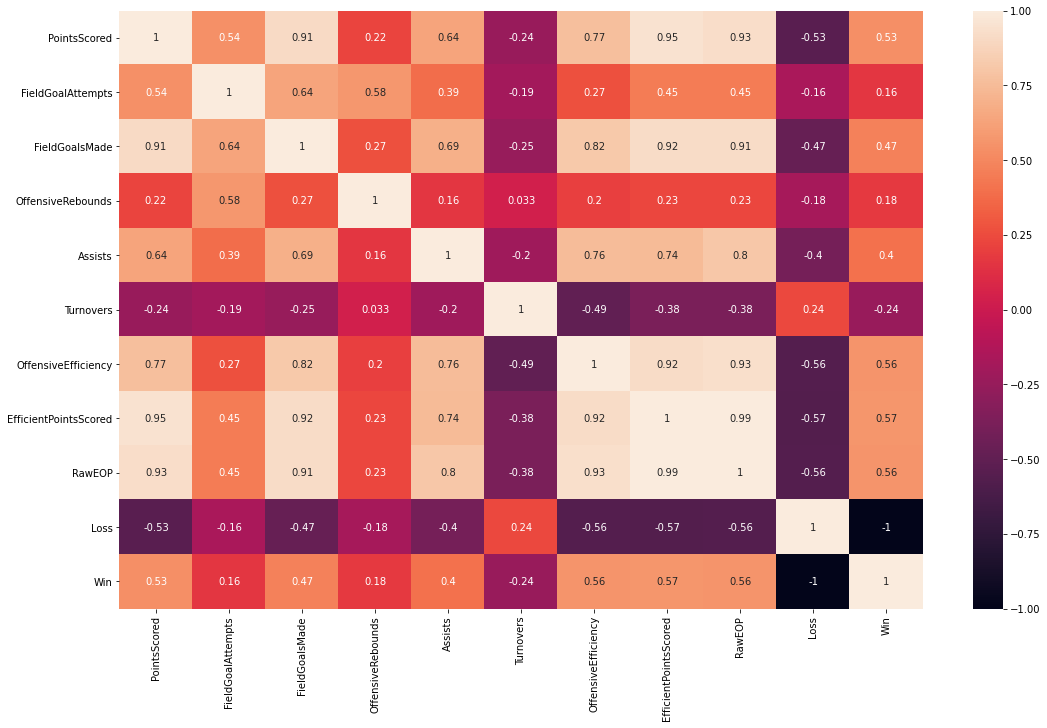

In [9]:
# Correlation heatmap
plt.figure(figsize=(18,11))
sns.heatmap(efficiency_correlations, annot = True );

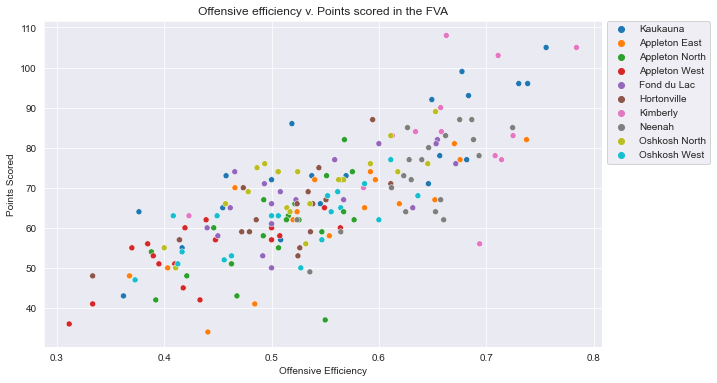

In [10]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="Team",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
#place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Offensive efficiency v. Points scored in the FVA");



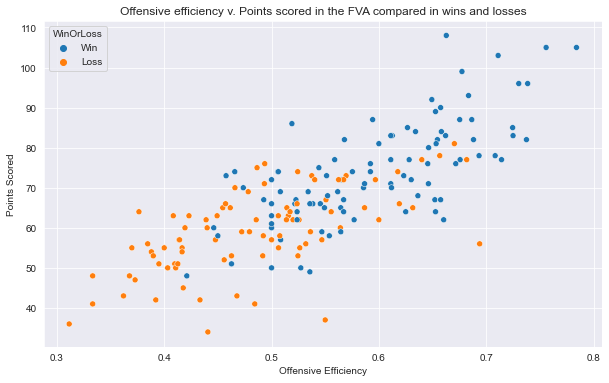

In [11]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="WinOrLoss",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
plt.title("Offensive efficiency v. Points scored in the FVA compared in wins and losses");


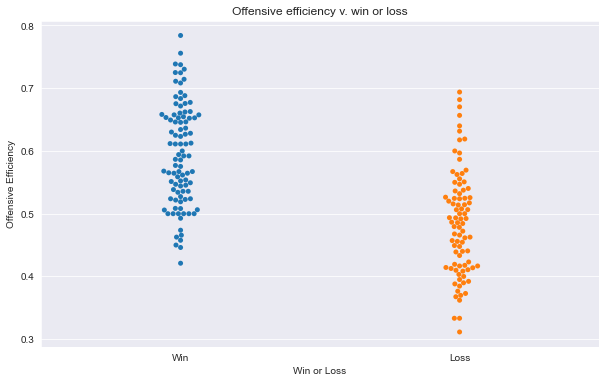

In [12]:
# Swarmplot for wins and losses with offensive efficency
plt.figure(figsize=(10,6))
sns.swarmplot(x=efficiency_fva['WinOrLoss'],
              y=efficiency_fva['OffensiveEfficiency'])
plt.ylabel("Offensive Efficiency")
plt.xlabel("Win or Loss")
plt.title("Offensive efficiency v. win or loss");

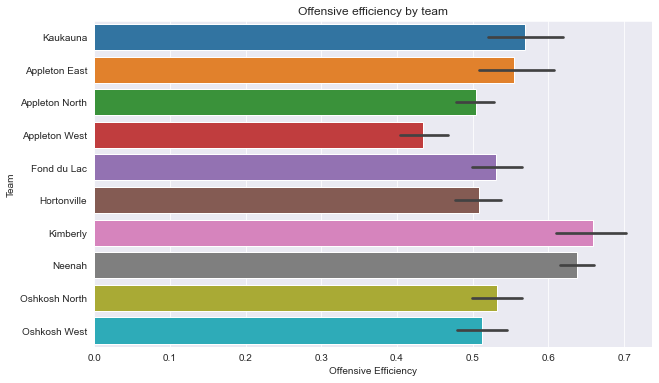

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x="OffensiveEfficiency", y="Team", data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

<Figure size 720x432 with 0 Axes>

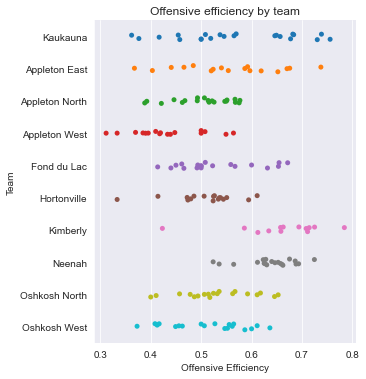

In [14]:
# Checking team by team offensive efficency 
plt.figure(figsize=(10,6))
sns.catplot(x = "OffensiveEfficiency", y = "Team", data = efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

<Figure size 720x432 with 0 Axes>

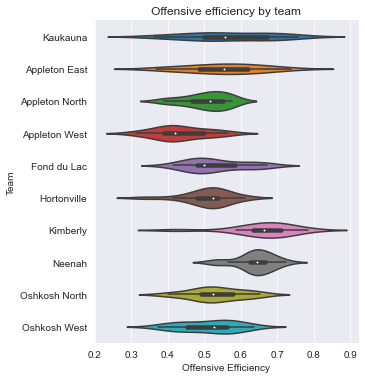

In [15]:
# Checking consistency of teams
plt.figure(figsize=(10,6))
sns.catplot(x="OffensiveEfficiency",y="Team",data=efficiency_fva, kind = 'violin')
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

In [16]:
# Creating data frames for teams 
appleton_east = efficiency_fva[efficiency_fva.Team == 'Appleton East']
appleton_north = efficiency_fva[efficiency_fva.Team == 'Appleton North']
appleton_west = efficiency_fva[efficiency_fva.Team == 'Appleton West']
fond_du_lac = efficiency_fva[efficiency_fva.Team == 'Fond du Lac']
hortonville = efficiency_fva[efficiency_fva.Team == 'Hortonville']
kaukauna = efficiency_fva[efficiency_fva.Team == 'Kaukauna']
kimberly = efficiency_fva[efficiency_fva.Team == 'Kimberly']
neenah = efficiency_fva[efficiency_fva.Team == 'Neenah']
oshkosh_north = efficiency_fva[efficiency_fva.Team == 'Oshkosh North']
oshkosh_west = efficiency_fva[efficiency_fva.Team == 'Oshkosh West']

In [17]:
# Creating data frames for teams and numeric values
appleton_east_num = appleton_east.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_num = appleton_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_num = appleton_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_num = fond_du_lac.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_num = hortonville.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_num = kaukauna.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_num = kimberly.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_num = neenah.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_num = oshkosh_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_num = oshkosh_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [19]:
# Creating data frames for teams to see what they give up 
appleton_east_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton East']
appleton_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton North']
appleton_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton West']
fond_du_lac_opp = efficiency_fva[efficiency_fva.Opponent == 'Fond du Lac']
hortonville_opp = efficiency_fva[efficiency_fva.Opponent == 'Hortonville']
kaukauna_opp = efficiency_fva[efficiency_fva.Opponent == 'Kaukauna']
kimberly_opp = efficiency_fva[efficiency_fva.Opponent == 'Kimberly']
neenah_opp = efficiency_fva[efficiency_fva.Opponent == 'Neenah']
oshkosh_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh North']
oshkosh_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh West']


In [20]:
# Create numeric values
appleton_east_opp_num = appleton_east_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_opp_num = appleton_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_opp_num = appleton_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_opp_num = fond_du_lac_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_opp_num = hortonville_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_opp_num = kaukauna_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_opp_num = kimberly_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_opp_num = neenah_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_opp_num = oshkosh_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_opp_num = oshkosh_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [21]:
# Appleton East offense correlations
appleton_east_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.497448,0.882564,-0.047801,0.824123,-0.204922,0.791503,0.940103,0.924108,-0.369723,0.369723
FieldGoalAttempts,0.497448,1.000000,0.563323,0.293788,0.510654,-0.138466,0.271108,0.391368,0.402170,0.079074,-0.079074
FieldGoalsMade,0.882564,0.563323,1.000000,-0.156873,0.902911,-0.290281,0.856583,0.919212,0.926318,-0.260608,0.260608
OffensiveRebounds,-0.047801,0.293788,-0.156873,1.000000,-0.133004,0.101494,-0.025181,-0.059925,-0.071741,-0.189487,0.189487
Assists,0.824123,0.510654,0.902911,-0.133004,1.000000,-0.326113,0.840376,0.895988,0.924020,-0.365159,0.365159
Turnovers,-0.204922,-0.138466,-0.290281,0.101494,-0.326113,1.000000,-0.565930,-0.407923,-0.415177,0.271904,-0.271904
OffensiveEfficiency,0.791503,0.271108,0.856583,-0.025181,0.840376,-0.565930,1.000000,0.944817,0.948041,-0.507769,0.507769
EfficientPointsScored,0.940103,0.391368,0.919212,-0.059925,0.895988,-0.407923,0.944817,1.000000,0.997023,-0.460683,0.460683
RawEOP,0.924108,0.402170,0.926318,-0.071741,0.924020,-0.415177,0.948041,0.997023,1.000000,-0.458828,0.458828
Loss,-0.369723,0.079074,-0.260608,-0.189487,-0.365159,0.271904,-0.507769,-0.460683,-0.458828,1.000000,-1.000000


In [22]:
# Appleton East offense compared in wins and losses 
appleton_east_win = appleton_east_num[appleton_east_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_east_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_east_loss = appleton_east_num[appleton_east_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_east_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_east_offense = pd.concat(frames)
appleton_east_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,70.333333,47.833333,25.000000,6.500000,19.666667,10.166667,0.622518,44.276726,53.822010
Number of Losses,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Losses,60.090909,48.818182,22.090909,5.181818,15.636364,12.909091,0.517717,32.059626,38.480897


In [23]:
# Appleton East defense correlations
appleton_east_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.237122,0.837748,-0.286905,0.577379,-0.453190,0.758520,0.944193,0.927449,-0.446818,0.446818
FieldGoalAttempts,0.237122,1.000000,0.500233,0.642947,0.089190,-0.217677,0.042435,0.170559,0.164772,-0.174450,0.174450
FieldGoalsMade,0.837748,0.500233,1.000000,-0.067253,0.627925,-0.462554,0.798038,0.875525,0.876282,-0.438304,0.438304
OffensiveRebounds,-0.286905,0.642947,-0.067253,1.000000,-0.492632,-0.038338,-0.296141,-0.284719,-0.309629,0.195561,-0.195561
Assists,0.577379,0.089190,0.627925,-0.492632,1.000000,-0.368847,0.720737,0.669491,0.723098,-0.350813,0.350813
Turnovers,-0.453190,-0.217677,-0.462554,-0.038338,-0.368847,1.000000,-0.719683,-0.628601,-0.636649,0.048346,-0.048346
OffensiveEfficiency,0.758520,0.042435,0.798038,-0.296141,0.720737,-0.719683,1.000000,0.925615,0.941216,-0.291132,0.291132
EfficientPointsScored,0.944193,0.170559,0.875525,-0.284719,0.669491,-0.628601,0.925615,1.000000,0.996805,-0.389615,0.389615
RawEOP,0.927449,0.164772,0.876282,-0.309629,0.723098,-0.636649,0.941216,0.996805,1.000000,-0.389461,0.389461
Loss,-0.446818,-0.174450,-0.438304,0.195561,-0.350813,0.048346,-0.291132,-0.389615,-0.389461,1.000000,-1.000000


In [24]:
# Appleton East opponent's offense compared in wins and losses 
appleton_east_win_opp = appleton_east_opp_num[appleton_east_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_east_loss_opp = appleton_east_opp_num[appleton_east_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_east_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_east_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_east_opp = pd.concat(frames)
appleton_east_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,61.000000,52.166667,23.166667,8.666667,11.833333,11.166667,0.525141,32.802925,37.721634
Number of Losses,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,72.444444,54.666667,27.333333,7.222222,14.222222,10.777778,0.574167,42.166610,48.457744


In [25]:
# Appleton North offense correlations
appleton_north_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.789806,0.904813,0.346146,0.469954,0.175719,0.573036,0.948354,0.927923,-0.514174,0.514174
FieldGoalAttempts,0.789806,1.000000,0.844651,0.595167,0.545176,0.035583,0.479667,0.768077,0.776154,-0.310276,0.310276
FieldGoalsMade,0.904813,0.844651,1.000000,0.277597,0.408829,0.121330,0.618470,0.905245,0.882238,-0.465211,0.465211
OffensiveRebounds,0.346146,0.595167,0.277597,1.000000,0.386609,0.082901,0.196850,0.339791,0.366437,-0.219525,0.219525
Assists,0.469954,0.545176,0.408829,0.386609,1.000000,0.109034,0.504684,0.522946,0.628278,0.033750,-0.033750
Turnovers,0.175719,0.035583,0.121330,0.082901,0.109034,1.000000,-0.509074,-0.071328,-0.070156,-0.027179,0.027179
OffensiveEfficiency,0.573036,0.479667,0.618470,0.196850,0.504684,-0.509074,1.000000,0.797577,0.818633,-0.325566,0.325566
EfficientPointsScored,0.948354,0.768077,0.905245,0.339791,0.522946,-0.071328,0.797577,1.000000,0.991256,-0.505840,0.505840
RawEOP,0.927923,0.776154,0.882238,0.366437,0.628278,-0.070156,0.818633,0.991256,1.000000,-0.455201,0.455201
Loss,-0.514174,-0.310276,-0.465211,-0.219525,0.033750,-0.027179,-0.325566,-0.505840,-0.455201,1.000000,-1.000000


In [26]:
# Appleton North offense compared in wins and losses 
appleton_north_win = appleton_north_num[appleton_north_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_north_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_north_loss = appleton_north_num[appleton_north_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_north_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_north_offense = pd.concat(frames)
appleton_north_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Wins,64.181818,49.909091,22.727273,7.818182,12.545455,12.818182,0.520898,33.795113,38.823679
Number of Losses,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,52.888889,45.333333,18.222222,6.666667,12.777778,12.555556,0.483546,25.692770,30.482938


In [27]:
# Appleton North opponent's offense correlations
appleton_north_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.258340,0.903108,0.096359,0.589469,-0.257241,0.820684,0.941866,0.920226,-0.571330,0.571330
FieldGoalAttempts,0.258340,1.000000,0.368418,0.771920,0.261306,-0.414021,0.129367,0.246381,0.248933,0.016207,-0.016207
FieldGoalsMade,0.903108,0.368418,1.000000,0.061657,0.819339,-0.413257,0.944322,0.973663,0.980014,-0.567742,0.567742
OffensiveRebounds,0.096359,0.771920,0.061657,1.000000,-0.180329,-0.158003,-0.150850,0.020135,-0.005262,0.211924,-0.211924
Assists,0.589469,0.261306,0.819339,-0.180329,1.000000,-0.250130,0.822419,0.742460,0.789678,-0.487371,0.487371
Turnovers,-0.257241,-0.414021,-0.413257,-0.158003,-0.250130,1.000000,-0.480985,-0.418023,-0.422150,0.608424,-0.608424
OffensiveEfficiency,0.820684,0.129367,0.944322,-0.150850,0.822419,-0.480985,1.000000,0.949000,0.962560,-0.698609,0.698609
EfficientPointsScored,0.941866,0.246381,0.973663,0.020135,0.742460,-0.418023,0.949000,1.000000,0.996980,-0.640275,0.640275
RawEOP,0.920226,0.248933,0.980014,-0.005262,0.789678,-0.422150,0.962560,0.996980,1.000000,-0.644492,0.644492
Loss,-0.571330,0.016207,-0.567742,0.211924,-0.487371,0.608424,-0.698609,-0.640275,-0.644492,1.000000,-1.000000


In [28]:
# Appleton North opponent's offense compared in wins and losses 
appleton_north_win_opp = appleton_north_opp_num[appleton_north_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_north_loss_opp = appleton_north_opp_num[appleton_north_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_north_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_north_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_north_opp = pd.concat(frames)
appleton_north_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Averages in Wins,53.000000,53.400000,18.000000,9.800000,11.400000,15.200000,0.414030,22.893164,26.624034
Number of Losses,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Averages in Losses,69.714286,53.142857,25.142857,8.285714,15.571429,9.857143,0.574651,40.564559,47.562815


In [29]:
# Appleton West offense correlations
appleton_west_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.102743,0.880885,-0.181964,0.248131,0.007754,0.718987,0.903470,0.851486,-0.416711,0.416711
FieldGoalAttempts,0.102743,1.000000,0.277349,0.374775,0.511162,-0.247019,0.167151,0.130569,0.213450,0.097984,-0.097984
FieldGoalsMade,0.880885,0.277349,1.000000,0.039408,0.293362,-0.041711,0.826461,0.898084,0.861674,-0.214092,0.214092
OffensiveRebounds,-0.181964,0.374775,0.039408,1.000000,0.154816,-0.034931,0.234977,0.064431,0.102178,-0.260613,0.260613
Assists,0.248131,0.511162,0.293362,0.154816,1.000000,-0.009303,0.488217,0.424410,0.579888,-0.211007,0.211007
Turnovers,0.007754,-0.247019,-0.041711,-0.034931,-0.009303,1.000000,-0.304380,-0.174817,-0.170956,0.147024,-0.147024
OffensiveEfficiency,0.718987,0.167151,0.826461,0.234977,0.488217,-0.304380,1.000000,0.941587,0.949414,-0.481878,0.481878
EfficientPointsScored,0.903470,0.130569,0.898084,0.064431,0.424410,-0.174817,0.941587,1.000000,0.983128,-0.521339,0.521339
RawEOP,0.851486,0.213450,0.861674,0.102178,0.579888,-0.170956,0.949414,0.983128,1.000000,-0.511794,0.511794
Loss,-0.416711,0.097984,-0.214092,-0.260613,-0.211007,0.147024,-0.481878,-0.521339,-0.511794,1.000000,-1.000000


In [30]:
# Appleton West Offense compared in wins and losses 
appleton_west_win = appleton_west_num[appleton_west_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_west_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_west_loss = appleton_west_num[appleton_west_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_west_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_west_offense = pd.concat(frames)
appleton_west_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Averages in Wins,62.500000,51.000000,22.0,12.000000,12.000000,13.500000,0.524648,32.852113,37.730563
Number of Losses,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
Averages in Losses,52.266667,52.733333,19.6,9.266667,9.266667,15.533333,0.421534,22.344299,25.396331


In [31]:
# Appleton West opponent's offense correlations
appleton_west_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.646478,0.945925,0.221315,0.660020,-0.445892,0.825788,0.964890,0.943379,NaN,NaN
FieldGoalAttempts,0.646478,1.000000,0.665338,0.648841,0.529350,-0.120483,0.410513,0.552303,0.558334,NaN,NaN
FieldGoalsMade,0.945925,0.665338,1.000000,0.219138,0.730605,-0.439225,0.884712,0.955443,0.951415,NaN,NaN
OffensiveRebounds,0.221315,0.648841,0.219138,1.000000,0.118649,0.138483,0.186908,0.205795,0.192379,NaN,NaN
Assists,0.660020,0.529350,0.730605,0.118649,1.000000,-0.331961,0.758988,0.728070,0.808083,NaN,NaN
Turnovers,-0.445892,-0.120483,-0.439225,0.138483,-0.331961,1.000000,-0.596462,-0.553353,-0.547090,NaN,NaN
OffensiveEfficiency,0.825788,0.410513,0.884712,0.186908,0.758988,-0.596462,1.000000,0.932199,0.943869,NaN,NaN
EfficientPointsScored,0.964890,0.552303,0.955443,0.205795,0.728070,-0.553353,0.932199,1.000000,0.991775,NaN,NaN
RawEOP,0.943379,0.558334,0.951415,0.192379,0.808083,-0.547090,0.943869,0.991775,1.000000,NaN,NaN
Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Appleton West opponent's offense compared in wins and losses 
appleton_west_win_opp = appleton_west_opp_num[appleton_west_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_west_loss_opp = appleton_west_opp_num[appleton_west_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_west_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_west_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_west_opp = pd.concat(frames)
appleton_west_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Averages in Wins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Losses,15.000000,15.0,15.0,15.0,15.000000,15.000000,15.000000,15.000000,15.000000
Averages in Losses,77.933333,56.6,28.0,11.4,18.666667,11.333333,0.613533,48.891887,57.944117


In [33]:
# Fond du Lac offense correlations
fond_du_lac_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.227812,0.691511,-0.018617,0.524751,-0.450234,0.684461,0.907270,0.882260,-0.406683,0.406683
FieldGoalAttempts,0.227812,1.000000,0.507665,0.467470,0.157317,-0.011558,-0.159695,0.013712,0.015579,0.176222,-0.176222
FieldGoalsMade,0.691511,0.507665,1.000000,-0.177416,0.625824,-0.402497,0.624658,0.709742,0.724966,-0.259053,0.259053
OffensiveRebounds,-0.018617,0.467470,-0.177416,1.000000,-0.222286,0.296605,-0.293792,-0.177584,-0.202635,0.131588,-0.131588
Assists,0.524751,0.157317,0.625824,-0.222286,1.000000,-0.297127,0.705873,0.663577,0.729426,-0.424192,0.424192
Turnovers,-0.450234,-0.011558,-0.402497,0.296605,-0.297127,1.000000,-0.712200,-0.635325,-0.623414,-0.068132,0.068132
OffensiveEfficiency,0.684461,-0.159695,0.624658,-0.293792,0.705873,-0.712200,1.000000,0.924372,0.940297,-0.373879,0.373879
EfficientPointsScored,0.907270,0.013712,0.709742,-0.177584,0.663577,-0.635325,0.924372,1.000000,0.995219,-0.421895,0.421895
RawEOP,0.882260,0.015579,0.724966,-0.202635,0.729426,-0.623414,0.940297,0.995219,1.000000,-0.432812,0.432812
Loss,-0.406683,0.176222,-0.259053,0.131588,-0.424192,-0.068132,-0.373879,-0.421895,-0.432812,1.000000,-1.000000


In [34]:
# Fond du Lac offense compared in wins and losses 
fond_du_lac_win = fond_du_lac_num[fond_du_lac_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = fond_du_lac_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
fond_du_lac_loss = fond_du_lac_num[fond_du_lac_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = fond_du_lac_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
fond_du_lac_offense = pd.concat(frames)
fond_du_lac_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
Averages in Wins,69.923077,47.538462,23.230769,5.769231,13.538462,11.538462,0.550168,38.955459,44.723860
Number of Losses,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Losses,61.833333,50.333333,21.166667,6.666667,10.500000,11.000000,0.488675,30.355180,34.356957


In [35]:
# Fond du Lac opponent's offense correlations
fond_du_lac_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.480681,0.958308,-0.268385,0.684095,-0.183747,0.724562,0.938695,0.916062,-0.481566,0.481566
FieldGoalAttempts,0.480681,1.000000,0.542016,0.335826,0.459271,-0.290521,0.206758,0.401089,0.404258,-0.157526,0.157526
FieldGoalsMade,0.958308,0.542016,1.000000,-0.217340,0.769015,-0.295995,0.791285,0.952153,0.940630,-0.470906,0.470906
OffensiveRebounds,-0.268385,0.335826,-0.217340,1.000000,0.066409,-0.153858,-0.024558,-0.179509,-0.154792,-0.034544,0.034544
Assists,0.684095,0.459271,0.769015,0.066409,1.000000,-0.639260,0.883225,0.844406,0.882260,-0.466041,0.466041
Turnovers,-0.183747,-0.290521,-0.295995,-0.153858,-0.639260,1.000000,-0.602653,-0.436426,-0.478683,0.116190,-0.116190
OffensiveEfficiency,0.724562,0.206758,0.791285,-0.024558,0.883225,-0.602653,1.000000,0.898172,0.914870,-0.507396,0.507396
EfficientPointsScored,0.938695,0.401089,0.952153,-0.179509,0.844406,-0.436426,0.898172,1.000000,0.996904,-0.520038,0.520038
RawEOP,0.916062,0.404258,0.940630,-0.154792,0.882260,-0.478683,0.914870,0.996904,1.000000,-0.523227,0.523227
Loss,-0.481566,-0.157526,-0.470906,-0.034544,-0.466041,0.116190,-0.507396,-0.520038,-0.523227,1.000000,-1.000000


In [36]:
# Fond du Lac oppononet's offense compared in wins and losses 
fond_du_lac_win_opp = fond_du_lac_opp_num[fond_du_lac_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
fond_du_lac_loss_opp = fond_du_lac_opp_num[fond_du_lac_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = fond_du_lac_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = fond_du_lac_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
fond_du_lac_opp = pd.concat(frames)
fond_du_lac_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.000000
Averages in Wins,62.1,53.1,23.3,8.4,11.8,10.3,0.522661,32.924072,37.786334
Number of Losses,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,5.000000
Averages in Losses,75.6,55.2,29.4,8.6,16.6,9.4,0.630206,48.612195,56.928156


In [37]:
# Hortonville offense correlations
hortonville_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.541750,0.829149,0.614665,0.163214,-0.133166,0.659900,0.938463,0.898833,-0.778102,0.778102
FieldGoalAttempts,0.541750,1.000000,0.567054,0.784766,0.286651,-0.262510,0.164429,0.409988,0.422119,-0.630293,0.630293
FieldGoalsMade,0.829149,0.567054,1.000000,0.465701,0.267380,-0.145775,0.788728,0.877435,0.870577,-0.571865,0.571865
OffensiveRebounds,0.614665,0.784766,0.465701,1.000000,0.301327,-0.033088,0.246631,0.503063,0.508579,-0.635008,0.635008
Assists,0.163214,0.286651,0.267380,0.301327,1.000000,0.038078,0.473562,0.289787,0.439258,-0.307350,0.307350
Turnovers,-0.133166,-0.262510,-0.145775,-0.033088,0.038078,1.000000,-0.303909,-0.247988,-0.239338,0.291781,-0.291781
OffensiveEfficiency,0.659900,0.164429,0.788728,0.246631,0.473562,-0.303909,1.000000,0.870554,0.907594,-0.456160,0.456160
EfficientPointsScored,0.938463,0.409988,0.877435,0.503063,0.289787,-0.247988,0.870554,1.000000,0.986593,-0.703622,0.703622
RawEOP,0.898833,0.422119,0.870577,0.508579,0.439258,-0.239338,0.907594,0.986593,1.000000,-0.703434,0.703434
Loss,-0.778102,-0.630293,-0.571865,-0.635008,-0.307350,0.291781,-0.456160,-0.703622,-0.703434,1.000000,-1.000000


In [38]:
# Hortonville offense compared in wins and losses 
hortonville_win = hortonville_num[hortonville_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = hortonville_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
hortonville_loss = hortonville_num[hortonville_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = hortonville_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
hortonville_offense = pd.concat(frames)
hortonville_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Averages in Wins,73.142857,62.285714,26.857143,13.571429,14.571429,13.285714,0.543079,39.839613,45.837185
Number of Losses,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
Averages in Losses,58.500000,52.900000,22.100000,9.600000,12.400000,15.300000,0.484668,28.573566,33.247099


In [39]:
# Hortonville opponent's offense correlations
hortonville_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.470388,0.943370,0.391527,0.831193,-0.551320,0.901929,0.974791,0.964085,-0.512275,0.512275
FieldGoalAttempts,0.470388,1.000000,0.580786,0.812504,0.647734,-0.182860,0.318859,0.474923,0.500984,0.207865,-0.207865
FieldGoalsMade,0.943370,0.580786,1.000000,0.472834,0.858408,-0.389794,0.859959,0.934794,0.932371,-0.286912,0.286912
OffensiveRebounds,0.391527,0.812504,0.472834,1.000000,0.616914,-0.045727,0.359886,0.448895,0.478152,-0.051751,0.051751
Assists,0.831193,0.647734,0.858408,0.616914,1.000000,-0.559161,0.879837,0.904253,0.927343,-0.264906,0.264906
Turnovers,-0.551320,-0.182860,-0.389794,-0.045727,-0.559161,1.000000,-0.681871,-0.625288,-0.626059,0.425430,-0.425430
OffensiveEfficiency,0.901929,0.318859,0.859959,0.359886,0.879837,-0.681871,1.000000,0.963460,0.963763,-0.540637,0.540637
EfficientPointsScored,0.974791,0.474923,0.934794,0.448895,0.904253,-0.625288,0.963460,1.000000,0.998221,-0.516244,0.516244
RawEOP,0.964085,0.500984,0.932371,0.478152,0.927343,-0.626059,0.963763,0.998221,1.000000,-0.491560,0.491560
Loss,-0.512275,0.207865,-0.286912,-0.051751,-0.264906,0.425430,-0.540637,-0.516244,-0.491560,1.000000,-1.000000


In [40]:
# Hortonville oppononet's offense compared in wins and losses 
hortonville_win_opp = hortonville_opp_num[hortonville_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
hortonville_loss_opp = hortonville_opp_num[hortonville_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = hortonville_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = hortonville_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
hortonville_opp = pd.concat(frames)
hortonville_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,61.0,54.666667,22.166667,9.666667,14.666667,18.333333,0.473441,29.249721,34.604185
Number of Losses,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
Averages in Losses,72.0,51.500000,25.000000,10.125000,17.000000,14.000000,0.573293,42.062003,49.801386


In [41]:
# Kaukauna offense correlations
kaukauna_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.603347,0.948341,0.577639,0.807373,-0.102847,0.853298,0.959731,0.949268,-0.549341,0.549341
FieldGoalAttempts,0.603347,1.000000,0.610006,0.459916,0.609025,-0.268688,0.366844,0.524525,0.538708,-0.031391,0.031391
FieldGoalsMade,0.948341,0.610006,1.000000,0.612386,0.827872,-0.117777,0.915355,0.964930,0.958558,-0.435037,0.435037
OffensiveRebounds,0.577639,0.459916,0.612386,1.000000,0.595964,0.050085,0.614947,0.640078,0.650646,-0.307460,0.307460
Assists,0.807373,0.609025,0.827872,0.595964,1.000000,-0.203539,0.816205,0.868549,0.900735,-0.452593,0.452593
Turnovers,-0.102847,-0.268688,-0.117777,0.050085,-0.203539,1.000000,-0.273627,-0.207946,-0.217385,-0.179895,0.179895
OffensiveEfficiency,0.853298,0.366844,0.915355,0.614947,0.816205,-0.273627,1.000000,0.953936,0.952449,-0.457711,0.457711
EfficientPointsScored,0.959731,0.524525,0.964930,0.640078,0.868549,-0.207946,0.953936,1.000000,0.997384,-0.512682,0.512682
RawEOP,0.949268,0.538708,0.958558,0.650646,0.900735,-0.217385,0.952449,0.997384,1.000000,-0.510593,0.510593
Loss,-0.549341,-0.031391,-0.435037,-0.307460,-0.452593,-0.179895,-0.457711,-0.512682,-0.510593,1.000000,-1.000000


In [42]:
# Kaukauna offense compared in wins and losses
kaukauna_win = kaukauna_num[kaukauna_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = kaukauna_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kaukauna_loss = kaukauna_num[kaukauna_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = kaukauna_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kaukauna_offense = pd.concat(frames)
kaukauna_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
Averages in Wins,82.923077,56.923077,29.615385,10.000000,18.230769,11.615385,0.613617,52.027048,60.965416
Number of Losses,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,65.444444,56.444444,23.333333,7.777778,12.777778,10.222222,0.506137,34.128448,39.186972


In [43]:
# Kaukauna opponent's offense correlations
kaukauna_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.178317,0.924395,0.032304,0.557768,-0.267922,0.834975,0.957957,0.933326,-0.828406,0.828406
FieldGoalAttempts,0.178317,1.000000,0.382682,0.804042,-0.281567,0.187314,-0.147654,0.048800,-0.003551,0.077870,-0.077870
FieldGoalsMade,0.924395,0.382682,1.000000,0.228243,0.571146,-0.232058,0.817478,0.920498,0.905736,-0.713043,0.713043
OffensiveRebounds,0.032304,0.804042,0.228243,1.000000,-0.224319,0.407589,-0.173943,-0.059033,-0.094589,0.125227,-0.125227
Assists,0.557768,-0.281567,0.571146,-0.224319,1.000000,-0.081995,0.778062,0.686395,0.753291,-0.429651,0.429651
Turnovers,-0.267922,0.187314,-0.232058,0.407589,-0.081995,1.000000,-0.515656,-0.423236,-0.410709,0.477218,-0.477218
OffensiveEfficiency,0.834975,-0.147654,0.817478,-0.173943,0.778062,-0.515656,1.000000,0.952663,0.969779,-0.803752,0.803752
EfficientPointsScored,0.957957,0.048800,0.920498,-0.059033,0.686395,-0.423236,0.952663,1.000000,0.994764,-0.836358,0.836358
RawEOP,0.933326,-0.003551,0.905736,-0.094589,0.753291,-0.410709,0.969779,0.994764,1.000000,-0.816392,0.816392
Loss,-0.828406,0.077870,-0.713043,0.125227,-0.429651,0.477218,-0.803752,-0.836358,-0.816392,1.000000,-1.000000


In [44]:
# Kaukauna oppenent's offense compared by win or loss
kaukauna_win_opp = kaukauna_opp_num[kaukauna_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
kaukauna_loss_opp = kaukauna_opp_num[kaukauna_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = kaukauna_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = kaukauna_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [loss, win]
kaukauna_opp = pd.concat(frames)
kaukauna_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Losses,6.000,6.0,6.0,6.000000,6.000000,6.000,6.000000,6.000000,6.000000
Averages in Losses,83.500,55.0,31.5,7.333333,18.333333,10.500,0.648944,54.671426,64.010757
Number of Wins,8.000,8.0,8.0,8.000000,8.000000,8.000,8.000000,8.000000,8.000000
Averages in Wins,60.875,56.0,23.0,8.250000,14.125000,15.625,0.478203,29.167717,34.371458


In [45]:
# Kimberly offense correlations
kimberly_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.636684,0.938548,-0.155141,0.700787,0.076913,0.485218,0.926845,0.898176,-0.679884,0.679884
FieldGoalAttempts,0.636684,1.000000,0.556458,-0.118312,0.148303,-0.049543,-0.161891,0.394428,0.345232,-0.206673,0.206673
FieldGoalsMade,0.938548,0.556458,1.000000,-0.142784,0.846158,0.069566,0.632145,0.951885,0.947432,-0.699591,0.699591
OffensiveRebounds,-0.155141,-0.118312,-0.142784,1.000000,-0.233641,0.114249,0.289425,-0.024310,-0.046873,0.295078,-0.295078
Assists,0.700787,0.148303,0.846158,-0.233641,1.000000,-0.082673,0.795846,0.857898,0.898957,-0.728308,0.728308
Turnovers,0.076913,-0.049543,0.069566,0.114249,-0.082673,1.000000,-0.136724,-0.025186,-0.044283,-0.061291,0.061291
OffensiveEfficiency,0.485218,-0.161891,0.632145,0.289425,0.795846,-0.136724,1.000000,0.770212,0.802758,-0.507515,0.507515
EfficientPointsScored,0.926845,0.394428,0.951885,-0.024310,0.857898,-0.025186,0.770212,1.000000,0.995787,-0.678759,0.678759
RawEOP,0.898176,0.345232,0.947432,-0.046873,0.898957,-0.044283,0.802758,0.995787,1.000000,-0.686587,0.686587
Loss,-0.679884,-0.206673,-0.699591,0.295078,-0.728308,-0.061291,-0.507515,-0.678759,-0.686587,1.000000,-1.000000


In [46]:
# Kimberly offense compared in wins and losses 
kimberly_win = kimberly_num[kimberly_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = kimberly_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kimberly_loss = kimberly_num[kimberly_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = kimberly_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kimberly_offense = pd.concat(frames)
kimberly_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Wins,87.727273,62.181818,35.272727,9.818182,18.909091,8.454545,0.677612,59.741400,69.603695
Number of Losses,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Averages in Losses,59.500000,58.500000,23.500000,13.000000,10.000000,8.000000,0.558477,32.755495,37.102826


In [47]:
# Kimberly opponent's offense correlations
kimberly_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.600705,0.916490,0.172739,0.568320,0.067503,0.556056,0.910794,0.900403,-0.078877,0.078877
FieldGoalAttempts,0.600705,1.000000,0.483322,-0.145338,0.505627,-0.264059,-0.088207,0.314996,0.322557,-0.007230,0.007230
FieldGoalsMade,0.916490,0.483322,1.000000,0.384974,0.395427,0.278187,0.571833,0.871910,0.849048,-0.164957,0.164957
OffensiveRebounds,0.172739,-0.145338,0.384974,1.000000,-0.061611,0.618029,0.221291,0.242463,0.225315,-0.176505,0.176505
Assists,0.568320,0.505627,0.395427,-0.061611,1.000000,-0.115518,0.387836,0.530496,0.600475,-0.068295,0.068295
Turnovers,0.067503,-0.264059,0.278187,0.618029,-0.115518,1.000000,-0.166204,-0.008868,-0.029160,0.362455,-0.362455
OffensiveEfficiency,0.556056,-0.088207,0.571833,0.221291,0.387836,-0.166204,1.000000,0.846520,0.856201,-0.547555,0.547555
EfficientPointsScored,0.910794,0.314996,0.871910,0.242463,0.530496,-0.008868,0.846520,1.000000,0.995641,-0.312689,0.312689
RawEOP,0.900403,0.322557,0.849048,0.225315,0.600475,-0.029160,0.856201,0.995641,1.000000,-0.317656,0.317656
Loss,-0.078877,-0.007230,-0.164957,-0.176505,-0.068295,0.362455,-0.547555,-0.312689,-0.317656,1.000000,-1.000000


In [48]:
# Kimberly opponent's offense compared in wins and losses 
kimberly_win_opp = kimberly_opp_num[kimberly_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = kimberly_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kimberly_loss_opp = kimberly_opp_num[kimberly_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = kimberly_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kimberly_opp = pd.concat(frames)
kimberly_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.000000
Averages in Wins,59.6,51.8,20.0,6.1,10.5,14.2,0.433234,26.055417,29.541948
Number of Losses,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
Averages in Losses,62.0,52.0,22.0,7.0,11.0,7.0,0.523810,32.476190,36.855238


In [49]:
# Neenah offense correlations
neenah_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.655158,0.868493,0.419826,0.525179,0.131914,0.730190,0.968054,0.942936,0.084435,-0.084435
FieldGoalAttempts,0.655158,1.000000,0.814908,0.572124,0.545127,0.008671,0.443552,0.621023,0.644225,0.080307,-0.080307
FieldGoalsMade,0.868493,0.814908,1.000000,0.390486,0.721255,0.168293,0.749719,0.875573,0.903968,0.117037,-0.117037
OffensiveRebounds,0.419826,0.572124,0.390486,1.000000,0.253480,0.316915,0.377256,0.424677,0.416806,-0.312411,0.312411
Assists,0.525179,0.545127,0.721255,0.253480,1.000000,0.369525,0.597356,0.574236,0.699144,-0.013232,0.013232
Turnovers,0.131914,0.008671,0.168293,0.316915,0.369525,1.000000,-0.096086,0.029147,0.083118,-0.213562,0.213562
OffensiveEfficiency,0.730190,0.443552,0.749719,0.377256,0.597356,-0.096086,1.000000,0.873203,0.890729,0.010158,-0.010158
EfficientPointsScored,0.968054,0.621023,0.875573,0.424677,0.574236,0.029147,0.873203,1.000000,0.986439,0.054986,-0.054986
RawEOP,0.942936,0.644225,0.903968,0.416806,0.699144,0.083118,0.890729,0.986439,1.000000,0.042044,-0.042044
Loss,0.084435,0.080307,0.117037,-0.312411,-0.013232,-0.213562,0.010158,0.054986,0.042044,1.000000,-1.000000


In [50]:
# Neenah offense compared in wins and losses
neenah_win = neenah_num[neenah_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = neenah_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
neenah_loss = neenah_num[neenah_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = neenah_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
neenah_offense = pd.concat(frames)
neenah_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
Averages in Wins,72.947368,52.789474,27.842105,9.631579,18.263158,10.578947,0.637696,46.915205,55.868833
Number of Losses,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Averages in Losses,77.000000,55.000000,30.000000,5.000000,18.000000,7.000000,0.640000,49.280000,58.035200


In [51]:
# Neenah opponent's offense correlations
neenah_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.340679,0.868760,0.084848,0.687400,0.016734,0.615652,0.915198,0.905543,0.071495,-0.071495
FieldGoalAttempts,0.340679,1.000000,0.657567,0.641923,0.133158,-0.149904,0.287340,0.379046,0.367191,0.264801,-0.264801
FieldGoalsMade,0.868760,0.657567,1.000000,0.331156,0.652512,-0.195480,0.734710,0.907571,0.903229,0.003759,-0.003759
OffensiveRebounds,0.084848,0.641923,0.331156,1.000000,-0.053991,-0.180672,0.399729,0.266555,0.256874,0.268853,-0.268853
Assists,0.687400,0.133158,0.652512,-0.053991,1.000000,-0.074463,0.630973,0.725021,0.757953,-0.192213,0.192213
Turnovers,0.016734,-0.149904,-0.195480,-0.180672,-0.074463,1.000000,-0.632323,-0.317802,-0.324590,-0.113761,0.113761
OffensiveEfficiency,0.615652,0.287340,0.734710,0.399729,0.630973,-0.632323,1.000000,0.872420,0.882512,-0.024947,0.024947
EfficientPointsScored,0.915198,0.379046,0.907571,0.266555,0.725021,-0.317802,0.872420,1.000000,0.998462,0.045760,-0.045760
RawEOP,0.905543,0.367191,0.903229,0.256874,0.757953,-0.324590,0.882512,0.998462,1.000000,0.024827,-0.024827
Loss,0.071495,0.264801,0.003759,0.268853,-0.192213,-0.113761,-0.024947,0.045760,0.024827,1.000000,-1.000000


In [52]:
# Neenah opponent's offense compared in wins and losses 
neenah_win_opp = neenah_opp_num[neenah_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = neenah_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
neenah_loss_opp = neenah_opp_num[neenah_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = neenah_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
neenah_opp = pd.concat(frames)
neenah_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
Averages in Wins,53.428571,42.071429,18.071429,6.785714,10.857143,13.357143,0.489554,26.982727,31.170351
Number of Losses,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Averages in Losses,50.000000,35.000000,18.000000,2.000000,13.000000,16.000000,0.500000,25.000000,29.940000


In [53]:
# Oshkosh North offense correlations
oshkosh_north_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.585668,0.927977,0.208851,0.482633,-0.109764,0.746891,0.928426,0.901223,-0.529548,0.529548
FieldGoalAttempts,0.585668,1.000000,0.712998,0.641454,0.303755,0.210283,0.186704,0.419659,0.409393,-0.313444,0.313444
FieldGoalsMade,0.927977,0.712998,1.000000,0.267512,0.475084,0.058922,0.667019,0.848585,0.826684,-0.483134,0.483134
OffensiveRebounds,0.208851,0.641454,0.267512,1.000000,0.229703,0.055206,0.219582,0.234567,0.246188,-0.403450,0.403450
Assists,0.482633,0.303755,0.475084,0.229703,1.000000,0.031587,0.616268,0.602070,0.693699,-0.471237,0.471237
Turnovers,-0.109764,0.210283,0.058922,0.055206,0.031587,1.000000,-0.473292,-0.323566,-0.305128,0.112782,-0.112782
OffensiveEfficiency,0.746891,0.186704,0.667019,0.219582,0.616268,-0.473292,1.000000,0.933361,0.942845,-0.572764,0.572764
EfficientPointsScored,0.928426,0.419659,0.848585,0.234567,0.602070,-0.323566,0.933361,1.000000,0.992303,-0.609706,0.609706
RawEOP,0.901223,0.409393,0.826684,0.246188,0.693699,-0.305128,0.942845,0.992303,1.000000,-0.623549,0.623549
Loss,-0.529548,-0.313444,-0.483134,-0.403450,-0.471237,0.112782,-0.572764,-0.609706,-0.623549,1.000000,-1.000000


In [54]:
# Oshkosh North offense compared in wins and losses 
oshkosh_north_win = oshkosh_north_num[oshkosh_north_num.Win == 1].drop(columns = ['Win', 'Loss'])
oshkosh_north_loss = oshkosh_north_num[oshkosh_north_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_north_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_north_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_north_offense = pd.concat(frames)
oshkosh_north_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,77.333333,52.833333,27.666667,9.833333,15.166667,14.166667,0.590601,45.951372,52.895627
Number of Losses,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
Averages in Losses,66.769231,47.615385,22.538462,6.461538,11.692308,15.153846,0.504725,33.990650,38.504559


In [55]:
# Oshkosh North opponent's offense correlations
oshkosh_north_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.738085,0.863860,0.518174,0.138181,-0.330835,0.602987,0.932222,0.869495,-0.484044,0.484044
FieldGoalAttempts,0.738085,1.000000,0.865219,0.708953,0.060729,0.012211,0.330495,0.640778,0.583235,-0.138934,0.138934
FieldGoalsMade,0.863860,0.865219,1.000000,0.754830,0.274273,-0.116308,0.694441,0.889834,0.860201,-0.229747,0.229747
OffensiveRebounds,0.518174,0.708953,0.754830,1.000000,0.439870,0.289813,0.614911,0.605107,0.622015,0.076053,-0.076053
Assists,0.138181,0.060729,0.274273,0.439870,1.000000,0.108909,0.728208,0.410598,0.551348,-0.134801,0.134801
Turnovers,-0.330835,0.012211,-0.116308,0.289813,0.108909,1.000000,-0.286139,-0.371141,-0.331589,0.514553,-0.514553
OffensiveEfficiency,0.602987,0.330495,0.694441,0.614911,0.728208,-0.286139,1.000000,0.847003,0.910237,-0.341423,0.341423
EfficientPointsScored,0.932222,0.640778,0.889834,0.605107,0.410598,-0.371141,0.847003,1.000000,0.986422,-0.459501,0.459501
RawEOP,0.869495,0.583235,0.860201,0.622015,0.551348,-0.331589,0.910237,0.986422,1.000000,-0.436564,0.436564
Loss,-0.484044,-0.138934,-0.229747,0.076053,-0.134801,0.514553,-0.341423,-0.459501,-0.436564,1.000000,-1.000000


In [56]:
# Oshkosh North opponent's offense compared in wins and losses 
oshkosh_north_win_opp = oshkosh_north_opp_num[oshkosh_north_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
oshkosh_north_loss_opp = oshkosh_north_opp_num[oshkosh_north_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_north_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_north_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_north_opp = pd.concat(frames)
oshkosh_north_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000
Averages in Wins,63.750000,55.000000,24.750000,10.5,14.750000,14.500000,0.530239,33.861236,40.126604
Number of Losses,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,77.666667,57.333333,27.666667,10.0,16.222222,10.666667,0.588602,46.350708,53.762502


In [57]:
# Oshkosh West offense correlations
oshkosh_west_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.392947,0.836423,0.284471,0.491872,-0.250623,0.720816,0.917889,0.892212,-0.574268,0.574268
FieldGoalAttempts,0.392947,1.000000,0.426831,0.747958,0.092675,-0.523880,0.075332,0.231711,0.212288,0.095195,-0.095195
FieldGoalsMade,0.836423,0.426831,1.000000,0.255545,0.488761,-0.218637,0.784362,0.878663,0.862923,-0.411673,0.411673
OffensiveRebounds,0.284471,0.747958,0.255545,1.000000,0.227594,-0.351508,0.208287,0.260498,0.269572,-0.026476,0.026476
Assists,0.491872,0.092675,0.488761,0.227594,1.000000,0.164165,0.623959,0.587996,0.694258,-0.122103,0.122103
Turnovers,-0.250623,-0.523880,-0.218637,-0.351508,0.164165,1.000000,-0.323577,-0.295579,-0.237321,0.364200,-0.364200
OffensiveEfficiency,0.720816,0.075332,0.784362,0.208287,0.623959,-0.323577,1.000000,0.932109,0.942398,-0.629460,0.629460
EfficientPointsScored,0.917889,0.231711,0.878663,0.260498,0.587996,-0.295579,0.932109,1.000000,0.989998,-0.658559,0.658559
RawEOP,0.892212,0.212288,0.862923,0.269572,0.694258,-0.237321,0.942398,0.989998,1.000000,-0.609015,0.609015
Loss,-0.574268,0.095195,-0.411673,-0.026476,-0.122103,0.364200,-0.629460,-0.658559,-0.609015,1.000000,-1.000000


In [58]:
# Oshkosh West offense compared in wins and losses 
oshkosh_west_win = oshkosh_west_num[oshkosh_west_num.Win == 1].drop(columns = ['Win', 'Loss'])
oshkosh_west_loss = oshkosh_west_num[oshkosh_west_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_west_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_west_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_west_offense = pd.concat(frames)
oshkosh_west_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
Averages in Wins,66.375000,48.625000,23.750000,8.125000,13.000000,11.125000,0.567477,37.855558,43.470031
Number of Losses,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Losses,57.181818,50.181818,20.636364,7.909091,12.090909,14.636364,0.471573,27.196747,31.722990


In [59]:
# Oshkosh West opponent's offense correlations
oshkosh_west_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.496605,0.792353,0.080254,0.677398,0.011729,0.759056,0.938319,0.908639,-0.567532,0.567532
FieldGoalAttempts,0.496605,1.000000,0.651852,0.650598,0.418793,-0.346930,0.503581,0.524246,0.516432,-0.181722,0.181722
FieldGoalsMade,0.792353,0.651852,1.000000,0.268786,0.712983,0.091621,0.911124,0.910884,0.906417,-0.522708,0.522708
OffensiveRebounds,0.080254,0.650598,0.268786,1.000000,0.168251,0.001136,0.269440,0.169280,0.179004,0.147764,-0.147764
Assists,0.677398,0.418793,0.712983,0.168251,1.000000,0.199565,0.809168,0.805027,0.866940,-0.430680,0.430680
Turnovers,0.011729,-0.346930,0.091621,0.001136,0.199565,1.000000,0.034548,0.039085,0.076324,0.222945,-0.222945
OffensiveEfficiency,0.759056,0.503581,0.911124,0.269440,0.809168,0.034548,1.000000,0.931104,0.943427,-0.637199,0.637199
EfficientPointsScored,0.938319,0.524246,0.910884,0.169280,0.805027,0.039085,0.931104,1.000000,0.993114,-0.621709,0.621709
RawEOP,0.908639,0.516432,0.906417,0.179004,0.866940,0.076324,0.943427,0.993114,1.000000,-0.604259,0.604259
Loss,-0.567532,-0.181722,-0.522708,0.147764,-0.430680,0.222945,-0.637199,-0.621709,-0.604259,1.000000,-1.000000


In [60]:
# Oshkosh West opponent's offense compared in wins and losses 
oshkosh_west_win_opp = oshkosh_west_opp_num[oshkosh_west_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
oshkosh_west_loss_opp = oshkosh_west_opp_num[oshkosh_west_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_west_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_west_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_west_opp = pd.concat(frames)
oshkosh_west_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,4.0,4.0,4.0,4.0,4.00,4.00,4.000000,4.000000,4.000000
Averages in Wins,58.0,46.5,19.0,9.0,10.75,13.75,0.478013,27.908594,31.852875
Number of Losses,10.0,10.0,10.0,10.0,10.00,10.00,10.000000,10.000000,10.000000
Averages in Losses,67.3,48.9,24.0,8.0,14.40,12.30,0.563962,38.132070,44.421237


In [61]:
fva_wins = [appleton_east_win, appleton_north_win, appleton_west_win, fond_du_lac_win, hortonville_win, kaukauna_win, kimberly_win, neenah_win, oshkosh_north_win, oshkosh_west_win]
fva_losses = [appleton_east_loss, appleton_north_loss, appleton_west_loss, fond_du_lac_loss, hortonville_loss, kimberly_loss, neenah_loss, oshkosh_north_loss, oshkosh_west_loss]
fva_wins = pd.concat(fva_wins)
fva_wins = fva_wins.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
fva_losses = pd.concat(fva_losses)
fva_losses = fva_losses.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [fva_wins, fva_losses]
fva_compared = pd.concat(frames)
fva_compared

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000
Averages in Wins,73.937500,53.385417,27.000000,9.000000,16.09375,11.364583,0.594775,44.706851,52.214136
Number of Losses,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000,78.000000,78.000000
Averages in Losses,58.589744,50.128205,21.102564,7.615385,12.00000,13.948718,0.482746,28.753278,33.319834


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [63]:
# Features for machine learning model
X = efficiency_fva_num.drop(columns = ['Win', 'Loss'], axis = 1).values
X

array([[73.        , 51.        , 20.        , ...,  0.45762712,
        33.40677966, 35.84135593],
       [72.        , 48.        , 25.        , ...,  0.56521739,
        40.69565217, 46.70956522],
       [86.        , 56.        , 27.        , ...,  0.51898734,
        44.63291139, 50.15493671],
       ...,
       [82.        , 61.        , 34.        , ...,  0.68817204,
        56.43010753, 72.12043011],
       [59.        , 55.        , 22.        , ...,  0.53623188,
        31.63768116, 37.75072464],
       [67.        , 45.        , 24.        , ...,  0.56716418,
        38.        , 44.03462687]])

In [65]:
# What we are trying to predict: Total points scored 
y = efficiency_fva.Win
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Win, dtype: uint8

In [66]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(146, 9) (37, 9) (146,) (37,)


In [67]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.8        0.86206897 0.72413793 0.62068966 0.62068966]
0.7255172413793103


In [68]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.83333333 0.62068966 0.68965517 0.55172414 0.65517241]
0.6701149425287356


In [69]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.76666667 0.82758621 0.79310345 0.72413793 0.62068966]
0.7464367816091954


In [70]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.73333333 0.72413793 0.68965517 0.68965517 0.5862069 ]
0.6845977011494253


In [71]:
# Best Model
svc = SVC(probability = True)
r2 = cross_val_score(svc, train_X, train_y, cv = 5)
print(r2)
print(r2.mean())

[0.86666667 0.79310345 0.65517241 0.72413793 0.62068966]
0.7319540229885058


In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[18:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [73]:
lin_reg = LinearRegression()
cv = cross_val_score(lin_reg, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[ 0.35918733  0.39875096  0.42801257  0.18599169 -0.10309865]
0.2537687794678471
